In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the file from local directory

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\Data Analysis Challenge Data Set.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
df_cat=df.select_dtypes(include='object')

#### We observe that the variables storing numerical data are not formatted well. Some columns consist words equivalent of numbers (Eg: Six for 6) while others have numbers stored as strings (Eg: '1464')

In [6]:
for col in df_cat.columns:
    print('{}:'.format(col))
    print(sorted(df_cat[col].unique()))
    print()

normalized-losses:
['101', '102', '103', '104', '106', '107', '108', '110', '113', '115', '118', '119', '121', '122', '125', '128', '129', '134', '137', '142', '145', '148', '150', '153', '154', '158', '161', '164', '168', '186', '188', '192', '194', '197', '231', '256', '65', '74', '77', '78', '81', '83', '85', '87', '89', '90', '91', '93', '94', '95', '98', '?']

make:
['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']

fuel-type:
['diesel', 'gas']

aspiration:
['std', 'turbo']

num-of-doors:
['?', 'four', 'two']

body-style:
['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']

drive-wheels:
['4wd', 'fwd', 'rwd']

engine-location:
['front', 'rear']

engine-type:
['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']

num-of-cylinders:
['eight', 'five', 'four', 'six', 'three', 'twelve', 'two']

f

#### '?' are used for null values. In the following script we will find all the columns with those values

In [7]:
df_nan=[]
for col in df.columns:
    if ('?' in df[col].unique()):
        df_nan.append(col)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


#### Below columns have the Null Values

In [8]:
df_nan 

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

#### We will replace '?' with nan (Null value) using np.nan

In [9]:
for col in df_nan:
    df[col].replace(to_replace='?',value=np.nan, inplace=True)
    df_cat[col].replace(to_replace='?',value=np.nan, inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:
for col in df_cat.columns:
    print('{}:'.format(col))
    print(df_cat[col].unique())
    print()

normalized-losses:
[nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

make:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type:
['gas' 'diesel']

aspiration:
['std' 'turbo']

num-of-doors:
['two' 'four' nan]

body-style:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels:
['rwd' 'fwd' '4wd']

engine-location:
['front' 'rear']

engine-type:
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

num-of-cylinders:
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuel-system:
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']

bore:
['3.47' '2.68

#### Typecast the columns with numerical data stored as strings to float data-type

In [11]:
cat_num=['normalized-losses','bore',"stroke",'horsepower','peak-rpm','price'] #Numbers as strings
for col in cat_num:
    df[col] = df[col].astype(float)

#### Replace the English words with numbers

In [12]:
df['num-of-doors'].replace({'four':4, 'two':2}, inplace=True)
df['num-of-cylinders'].replace({'four':4,'six':6,'five':5,'twelve':12,'three':3,'eight':8,'two':2}, inplace=True)

In [89]:
df_tran=df.copy()

#### Replace the nan values with mode of the column

In [90]:
df_tran['num-of-doors'].fillna(df_tran['num-of-doors'].mode(), inplace=True)
df_tran.fillna(df_tran.mean(), inplace=True)

In [91]:
df_tran.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### All null values have been imputed

In [92]:
df_tran.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [93]:
df_tran.price.mean()

13207.129353233831

#### Pair-plots of various numerical columns showing their distributions

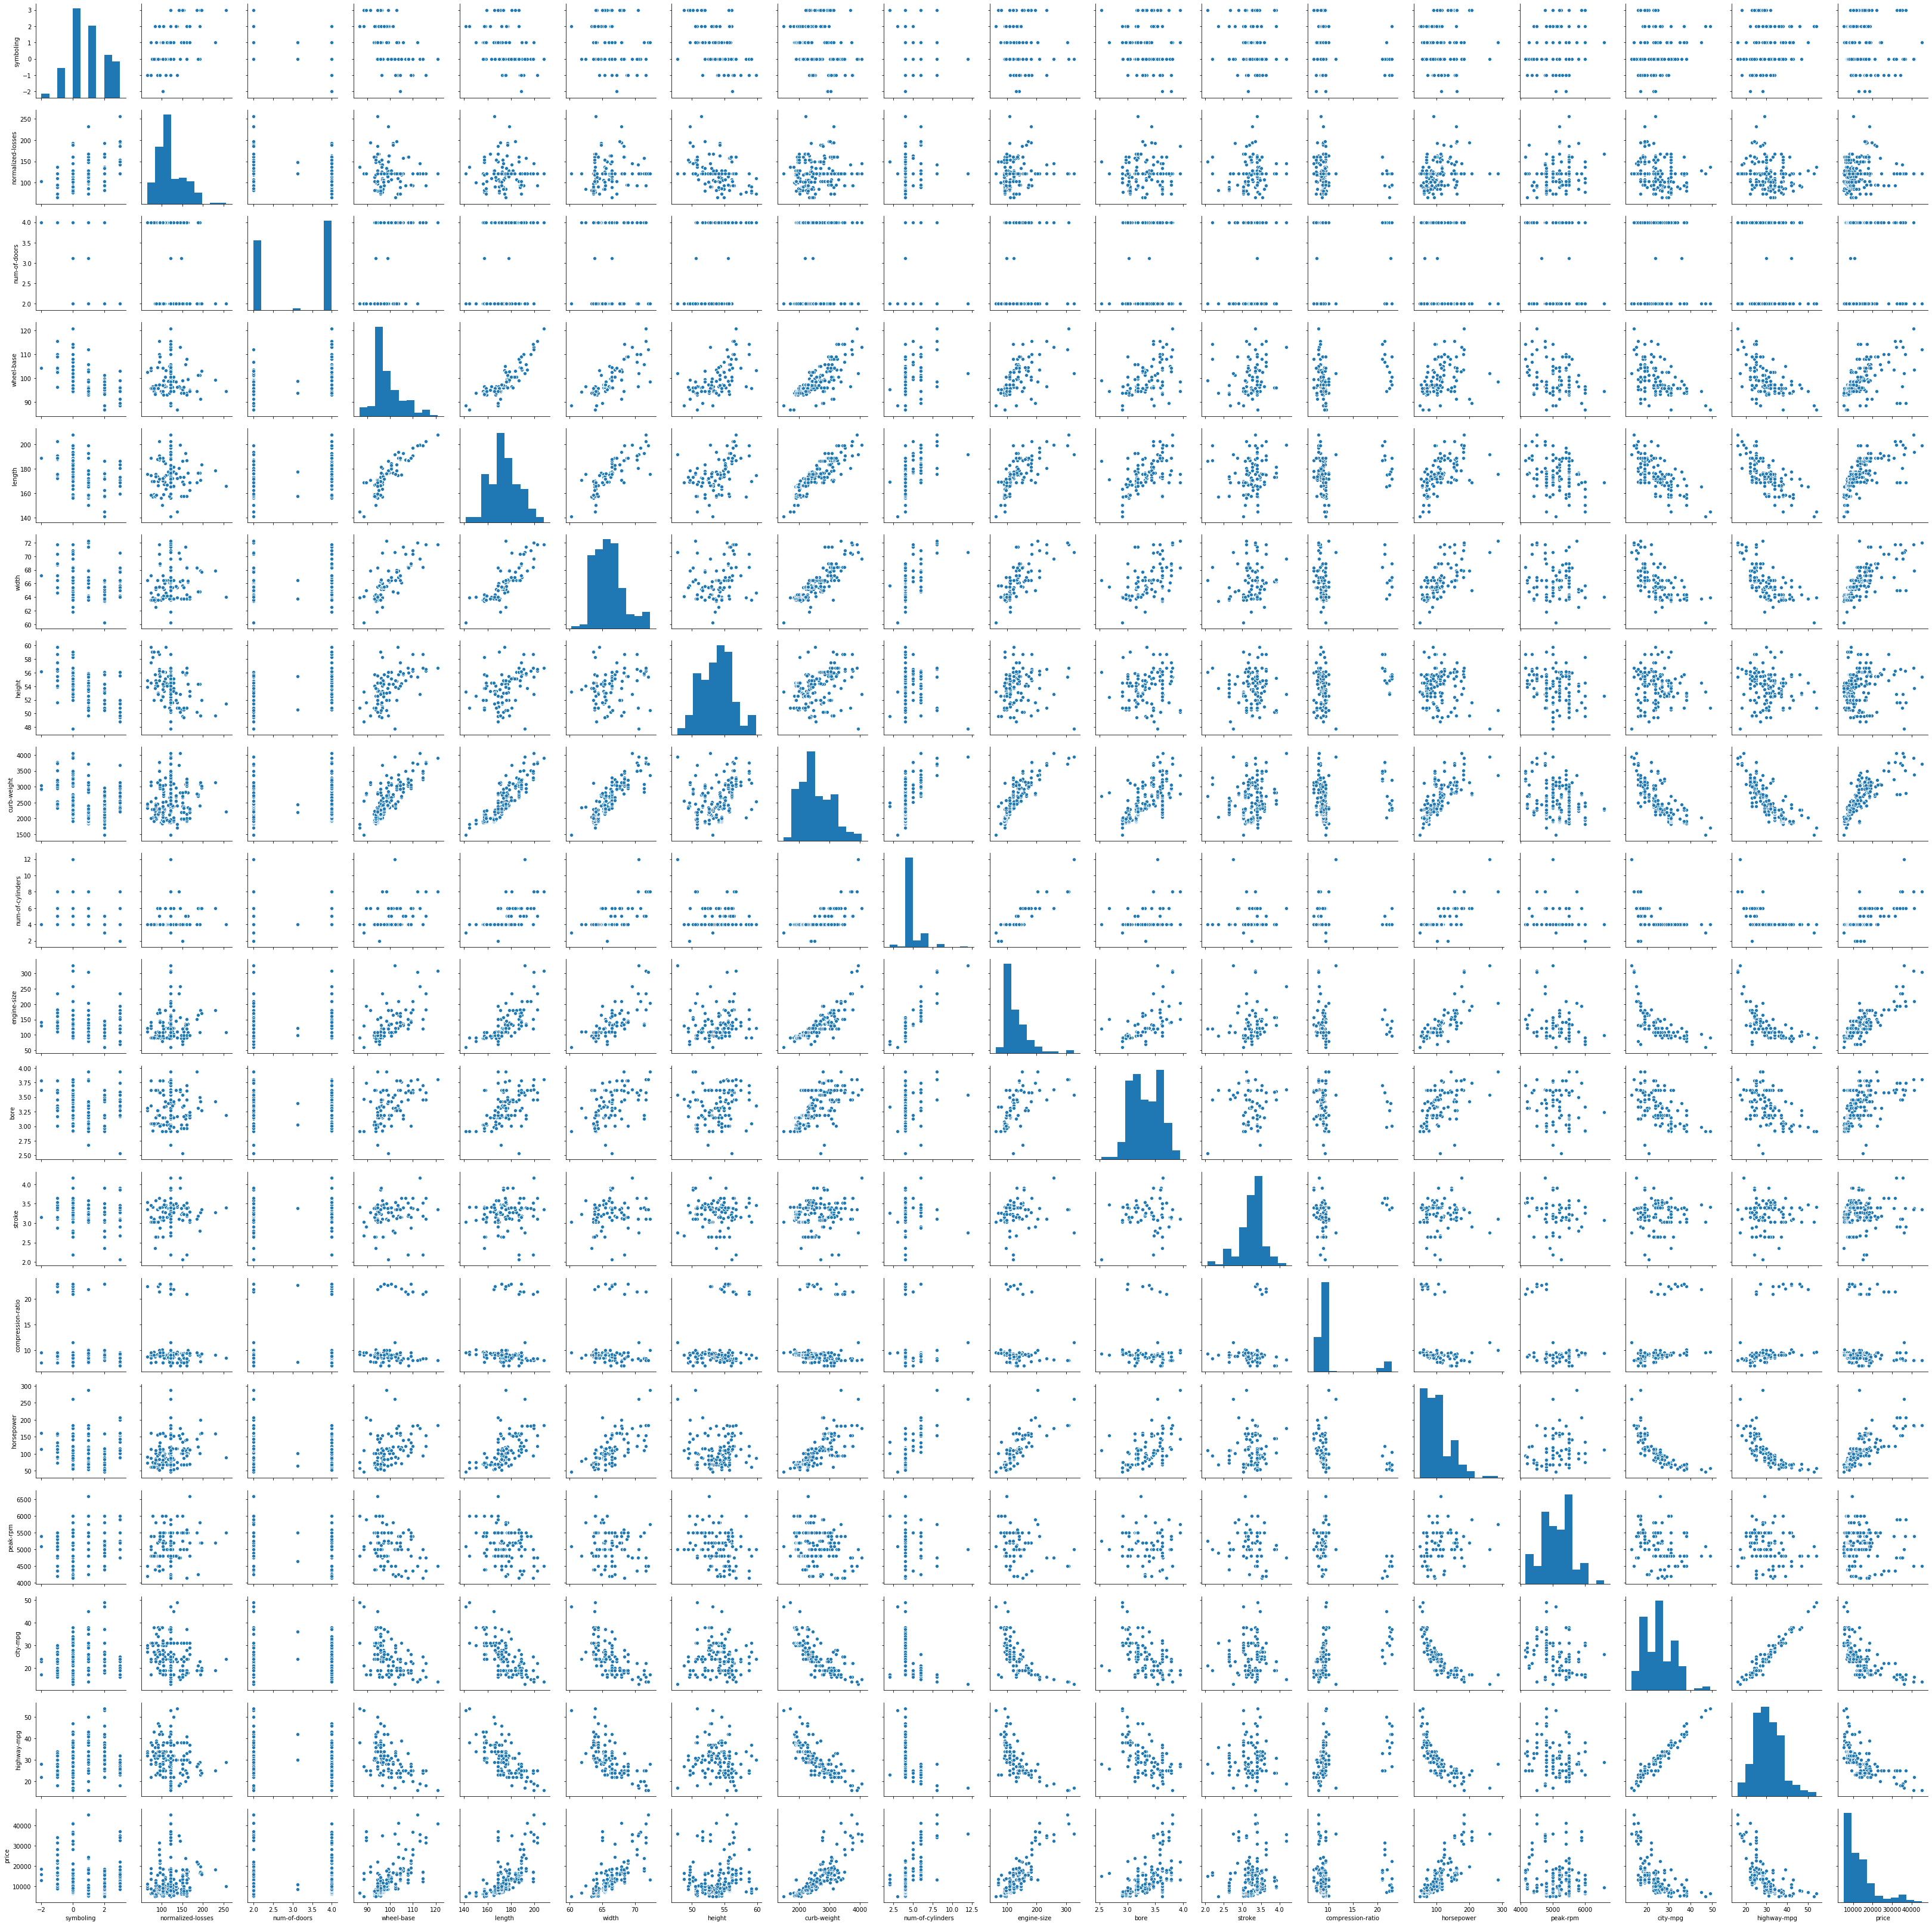

In [23]:
sns.pairplot(df_tran.loc[:,['']].select_dtypes(exclude='object'))

#### We cluster the dataframe into different clusters to gain initial insights based on numerical data columns

In [97]:
from sklearn.cluster import AgglomerativeClustering

In [98]:
Hclustering=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
Hclustering.fit_predict(df_tran.select_dtypes(exclude='object'))

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 3, 1, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2], dtype=int64)

In [99]:
df_tran['Clustering_Labels']=Hclustering.labels_

#### As it can be observed in the standard deviations values below, the features that show most variation are curb-weight, engine size, normalized losses, peak-rpm, horse-power, price. Further analyses reveal the following:
1. Cluster 0: It represents automobiles with lower mean price. It is characterized by lowest mean curb-weight relative to other clusters, smallest engine-size, lowest horse power, relatively high peak-rpm, highest city-mpg and highway-mpg, and least number of cylinders
2. Cluster 1: It represents most expensive automobiles. It is characterized by lowest city-mpg and highway-mpg, high horsepower, lowest compression-ratio, largest engine size, and highest length
3. Cluster 2: It represents automobiles with mean price higher than the population mean. It is characterized moderately high city-mpg and highway-mpg, relatively low horse-power, highest compression ratio, relatively lower engine-size, moderate curb-weight, and interesingly zero symboling
4. Cluster 3: It represents high-end automobiles: It is represented by low city-mpg and highway mpg, highest horsepower, relatively large engine-size, high mean number of cylinders, high curb weight,


#### Conclusion: 
1. Expensive Automobiles: Low city-mpg and highway-mpg, high horsepower, low compression ratio, and large engize size
2. Cheaper Automobiles: High city-mpg and highway-mpg, low horsepower, high compression ratio, and small engize size

In [100]:
df_tran_grp=df_tran.groupby(df_tran['Clustering_Labels']).mean()
df_tran_grp

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Clustering_Labels
Clustering_Labels,,,,,,,,,,,,,,,,,,,
0,0.888889,121.566667,3.112479,97.837222,172.055556,65.495556,53.650000,2445.150000,4.127778,116.222222,3.297272,3.246843,9.968444,96.786180,5149.726327,26.222222,31.883333,10793.519541,0.0
1,0.333333,122.000000,2.666667,112.133333,200.366667,70.533333,55.266667,3665.000000,7.333333,273.666667,3.740000,3.363333,8.000000,183.333333,4800.000000,14.666667,18.000000,42558.333333,1.0
2,0.000000,127.818182,3.454545,105.472727,185.445455,68.527273,55.181818,3131.363636,5.272727,162.000000,3.464545,3.310909,13.690909,124.454545,4772.727273,20.636364,25.272727,23735.363636,2.0
3,0.909091,123.272727,3.090909,103.436364,188.100000,68.772727,53.072727,3484.000000,6.818182,226.636364,3.614545,3.310909,10.027273,184.727273,5168.181818,16.272727,21.181818,34169.454545,3.0


In [101]:
df_tran_grp.std()

symboling                0.444244
normalized-losses        2.862285
num-of-doors             0.322644
wheel-base               5.903232
length                  11.613185
width                    2.091543
height                   1.101596
curb-weight            538.517539
num-of-cylinders         1.464146
engine-size             69.483088
bore                     0.191216
stroke                   0.047676
compression-ratio        2.374403
horsepower              43.866313
peak-rpm               215.534867
city-mpg                 5.171905
highway-mpg              5.991115
price                13712.758019
Clustering_Labels        1.290994
dtype: float64

#### Predictive Analytic Model is made by stacking GradientBoosting Trees and Random Forests with final estimator as LassoCV. Achieved an accuracy of over 93%

In [123]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor

In [126]:
print(X_train.select_dtypes(exclude='object').columns)
print(X_train.select_dtypes(include='object').columns)

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')
Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')


In [133]:
numeric_features =X_train.select_dtypes(exclude='object').columns
numeric_transformer = Pipeline(steps=[('scaler',StandardScaler(with_mean=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

X_train_scale=preprocessor.fit_transform(X_train)
X_test_scale=preprocessor.transform(X_test)

#### Base models are stacked 

In [142]:
models = [('clf_grad',GradientBoostingRegressor(learning_rate=0.01)),
          ('clf_rand',RandomForestRegressor())]

In [143]:
stacking=StackingRegressor(estimators=models,cv=10,n_jobs=-1)

In [144]:
stacking.fit(X_train_scale,y_train)

StackingRegressor(cv=10,
                  estimators=[('clf_grad',
                               GradientBoostingRegressor(learning_rate=0.01)),
                              ('clf_rand', RandomForestRegressor())],
                  n_jobs=-1)

In [145]:
stacking.score(X_test_scale,y_test)

0.9346738435366011